<a href="https://colab.research.google.com/github/AtrCheema/AI4Water/blob/dev/examples/hyper_para_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyper parameter optimization
This file describes how to do hyper parameter optimization of machine learningand deep learning algorithms using
`HyperOpt` module of `AI4Water` package. In this file, random search, grid search Bayesian methods are implemented.

In [1]:
# install AI4Water package if it is nto available already
try:
    from AI4Water import Model
except ImportError:
    !python -m pip install git+https://github.com/AtrCheema/AI4Water.git@dev

  Cloning https://github.com/AtrCheema/AI4Water.git (to revision dev) to /tmp/pip-req-build-7a_qxsge
  Running command git clone -q https://github.com/AtrCheema/AI4Water.git /tmp/pip-req-build-7a_qxsge
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
     |████████████████████████████████| 102kB 4.8MB/s 
  Created wheel for AI4Water: filename=AI4Water-1.0-cp37-none-any.whl size=350412 sha256=46a24fa82025677a8af7a0c952f3cc6514d8c26844596469eadba2b8b6cc09e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-67itewrl/wheels/12/e9/b4/a58b20a0b3e80c4aaf910662423ce1a0f11b19c0732ac727e7
Successfully built AI4Water


In [2]:
from AI4Water import Model
from AI4Water.hyper_opt import HyperOpt
from AI4Water.utils.datasets import load_30min

from skopt.space import Real, Categorical, Integer
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)


Read the data file. Our data contains 1446 rows nad 24 columns.

In [3]:
data = load_30min()
data.shape

(1446, 25)

In [4]:
data.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,target1,target2,target3,target4,target5,target6,target7,target8,target9,target10,target11,target12
Date_Time2,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-19 00:00:00,36.407149,19.321232,33.956059,19.780000,0.0,0.0,0.0,0.0,159.533333,0.960000,1002.856667,1007.256667,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 00:30:00,35.562515,19.320124,33.950508,19.093333,0.0,0.0,0.0,0.0,86.596667,0.163333,1002.300000,1006.700000,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 01:00:00,34.808016,19.319666,33.942532,18.733333,0.0,0.0,0.0,0.0,2.260000,0.080000,1001.973333,1006.373333,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 01:30:00,30.645216,19.320406,33.931263,18.760000,0.0,0.0,0.0,0.0,62.710000,0.193333,1001.776667,1006.120000,95.006667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19 02:00:00,26.608980,19.326729,33.917961,18.633333,0.0,0.0,0.0,0.0,63.446667,0.510000,1001.743333,1006.103333,95.006667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Define which columns in the data are to be used as inputs and which columns are to be used as outputs. 


In [5]:
inputs = ['input1', 'input2', 'input3', 'input4', 'input5', 'input6', 'input8',  'input11']
outputs = ['target5']

Let's first use [xgboost](https://xgboost.readthedocs.io/en/latest/python/python_api.html) model with some random parameters which go in `ml_model_args`.

In [6]:
ai4water_args = {"inputs": inputs,
               "outputs": outputs,
               "val_data": "same",
               "model": {"xgboostregressor": {}}, 
               "test_fraction": 0.3}

These and other hyper parameters are used to initiate the `Model`.

# Grid Search
Define the parameter space.

In [7]:
dims = {'n_estimators': [1000, 1200, 1400, 1600, 1800,  2000],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001,  0.0005],
        'booster': ["gbtree", "dart"]}        

In [8]:
opt = HyperOpt("grid",
               param_space=dims,
               ai4water_args=ai4water_args,
               data=data,
               )

total number of iterations: 288
downloading file to /usr/local/lib/python3.7/dist-packages/AI4Water/utils/datasets/nasdaq100_padding.csv
[13:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 237198711908880.6
[13:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 237198711908880.6
[13:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 237198711908880.6
[13:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 237198711908880.6
[13:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 237198711908880.6
[13:33:59] WARNING: /workspace/src/objective/regression_obj.cu:

/usr/local/lib/python3.7/dist-packages/AI4Water/hyper_opt/hyper_opt.py:1160: UserWarning:

You must optuna and plotly installed to get hyper-parameter importance.



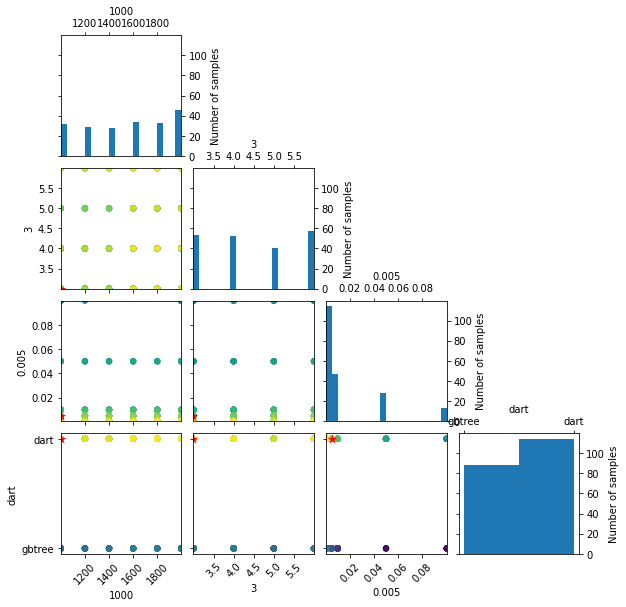

In [9]:
sr = opt.fit()

In [10]:
opt.best_paras()

{'booster': 'dart',
 'learning_rate': 0.005,
 'max_depth': 3,
 'n_estimators': 1000}

building ML based model for regression problem

********** Removing Samples with nan labels  **********

input_x shape:  (152, 8)
prev_y shape:  (152, 1)
target shape:  (152,)
[13:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

********** Removing Samples with nan labels  **********

input_x shape:  (66, 8)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 199760437238525.12


199760437238525.12

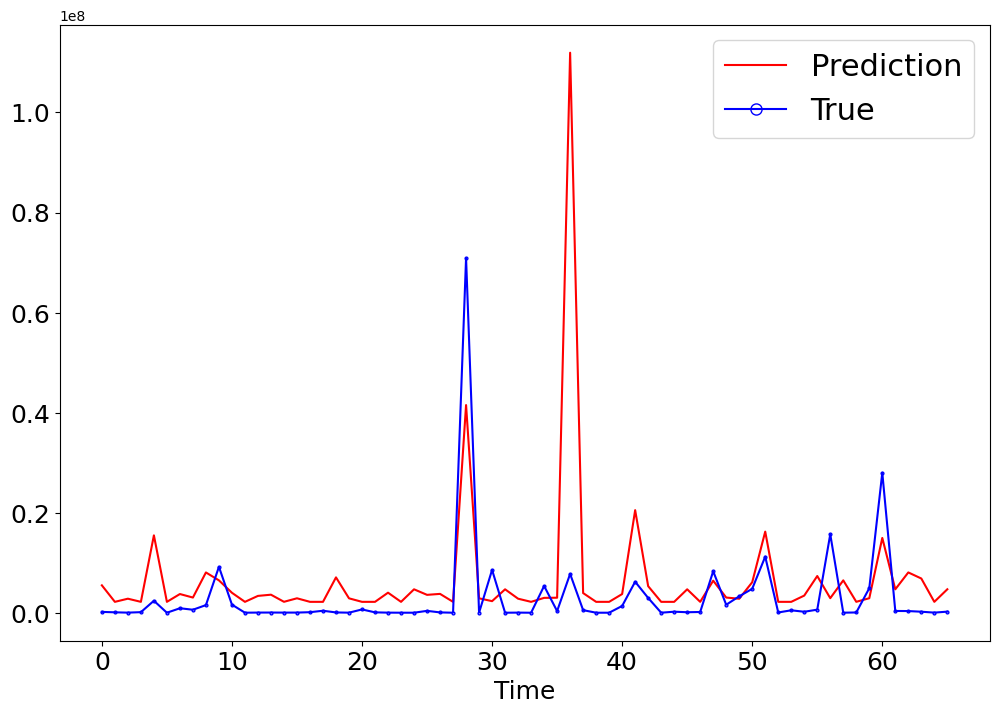

In [11]:
opt.predict(**opt.best_paras())

# Random Search

Now we will use `random search` algorithm for hyper parameter optimization. The most important parameter is `n_iter` 
which determines how many iterations we are going to use. 

total number of iterations: 100
[13:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 216937938887946.7
[13:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 216446821245924.5
[13:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 219175083250077.25
[13:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 224263538652012.47
[13:44:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 216725986203783.03
[13:44:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 216305391472860.4
[13:4

/usr/local/lib/python3.7/dist-packages/AI4Water/hyper_opt/hyper_opt.py:1160: UserWarning:

You must optuna and plotly installed to get hyper-parameter importance.



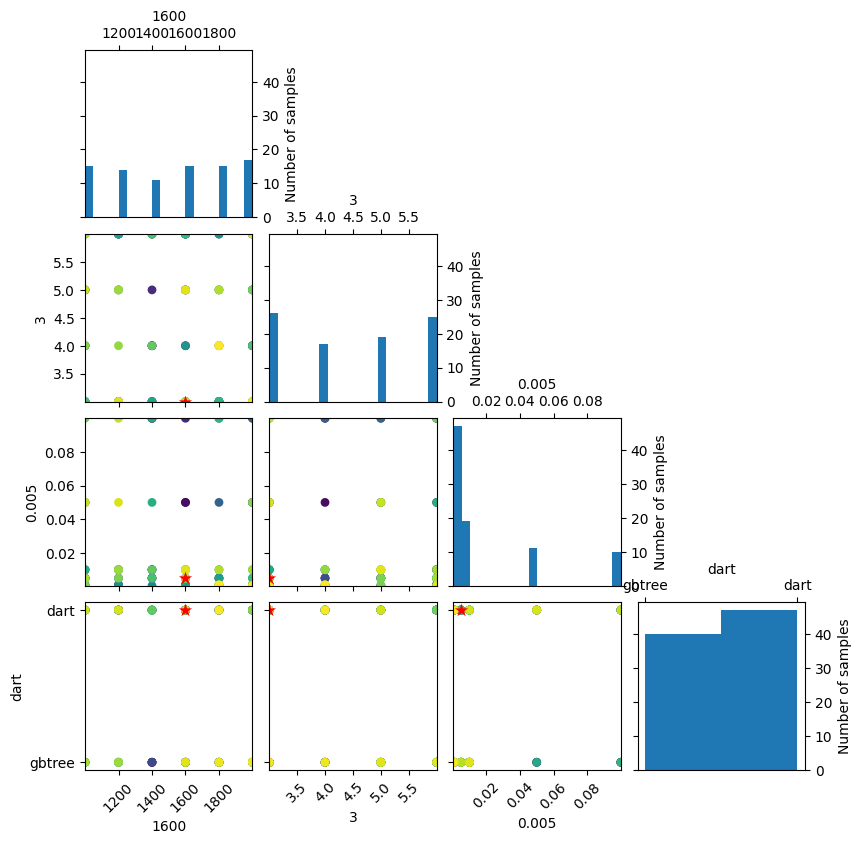

In [12]:
opt = HyperOpt("random",
               param_space=dims,
               ai4water_args=ai4water_args,
               data=data,
               n_iter=100
               )
sr = opt.fit()

In [13]:
#Find the best parameters
opt.best_paras()

{'booster': 'dart',
 'learning_rate': 0.005,
 'max_depth': 3,
 'n_estimators': 1600}

building ML based model for regression problem

********** Removing Samples with nan labels  **********

input_x shape:  (152, 8)
prev_y shape:  (152, 1)
target shape:  (152,)
[13:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

********** Removing Samples with nan labels  **********

input_x shape:  (66, 8)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 204516905379576.25


204516905379576.25

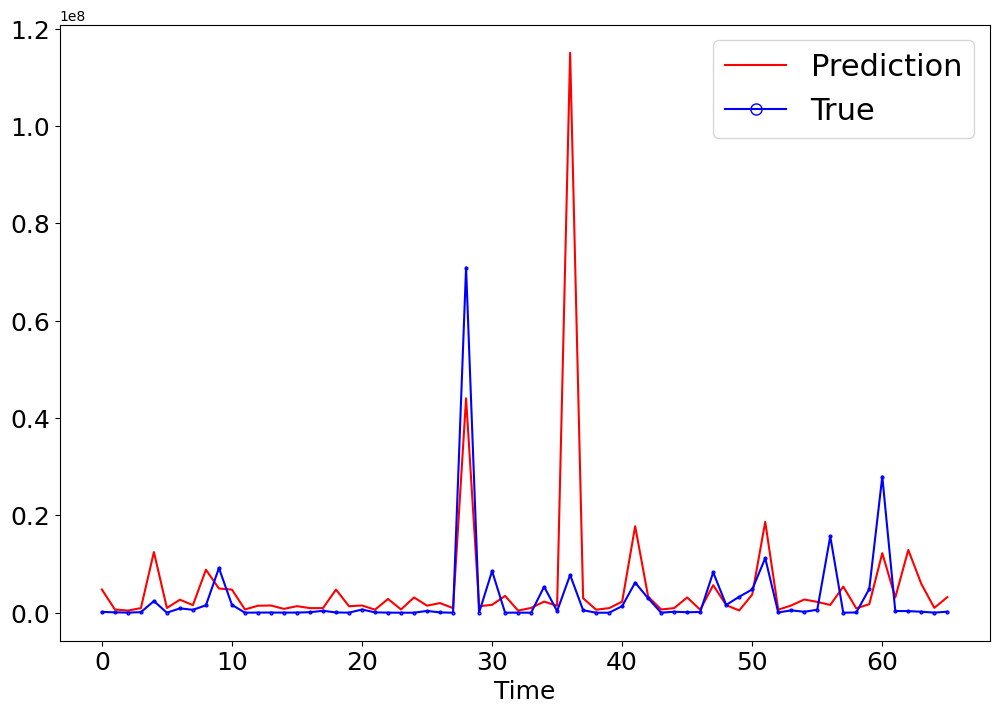

In [14]:
# make prediction using best parameters.
opt.predict(**opt.best_paras())

# Bayesian
Now we optimize the same parameters with `Bayesian` optimization. Under the hood, we use [`gp_minimize`](https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html#skopt.gp_minimize) function of [`skopt`](https://scikit-optimize.github.io/stable/index.html).

We first need to define the parameter space. But since we are going to use skopt, we need to define the parameter space 
using space classes available from skopt. The parameter space can be [`Integer`](https://scikit-optimize.github.io/stable/modules/generated/skopt.space.space.Integer.html#skopt.space.space.Integer), [`Real`](https://scikit-optimize.github.io/stable/modules/generated/skopt.space.space.Real.html#skopt.space.space.Real) or [`Categorical`](https://scikit-optimize.github.io/stable/modules/generated/skopt.space.space.Categorical.html#skopt.space.space.Categorical) depending upon the parameter.

In [15]:
dims = [Integer(low=1000, high=2000, name='n_estimators'),
        Integer(low=3, high=6, name='max_depth'),
        Real(low=1e-5, high=0.1, name='learning_rate'),
        Categorical(categories=["gbtree", "dart"], name="booster")
        ]

We need to initiate the `HyperOpt` class same as above. All the additional parameters which we want to pass `gp_minimize`
can be passed to `HyperOpt` class. Finally we use `fit` method to start optimization. 

In [16]:
opt = HyperOpt("bayes",
               param_space=dims,
               ai4water_args=ai4water_args,
               data=data,
               n_calls=100,
               x0=[1000, 3, 0.01, "gbtree"],
               n_random_starts=3,  # the number of random initialization points
               random_state=2
               
               )
sr = opt.fit()

[13:48:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25
[13:48:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 214417120457608.66
[13:48:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 230728237575660.5
[13:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 216007487649216.47
[13:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 215283870280688.5
[13:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 225646275018674.6


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 214417120457608.66
[13:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 217888212843811.06


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25
[13:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 214416830700836.38


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25
[13:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 215039436739919.1


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25
[13:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209941360367453.56


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944272566480.25
[13:48:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945021087831.16


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945248294097.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:48:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78
[13:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 213777399756376.22


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944126992902.5


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945525648347.6


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944217544962.6


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944217544962.6


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209941362396353.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944217544962.6


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945248294097.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945525648347.6


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944428568626.56


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209945559319173.78
[13:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 210186001744342.34


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944217544962.6


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28
[13:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944134553953.12


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944217544962.6


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944217544962.6


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944217544962.6


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944217544962.6


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944217544962.6


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 210186027659427.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944147971391.78


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



[13:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation mse 209944215027088.28
could not pickle results


/usr/local/lib/python3.7/dist-packages/AI4Water/hyper_opt/hyper_opt.py:1160: UserWarning:

You must optuna and plotly installed to get hyper-parameter importance.



# Bayesian with LSTM model

Now we build and [`LSTM`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) based model and optimize its parameters with Bayesian optimization method. The `layers` dictionary is used to define the structure of the neural network. 

In [17]:
layers = {
    "LSTM": {"config": {"units": 64}},
    "Dense": {"config": {"units": 1, "activation": "relu"}},
    "Reshape": {"config": {"target_shape": (1,1)}}
}

dl4seq_args = {"inputs": inputs,
               "outputs": outputs,
               "lookback": 4,
               "val_data": "same",
               "test_fraction": 0.3,
               "model": {'layers': layers},
               "epochs": 500
               }
# make model args

#initiate the mdoel
model = Model(data=data, verbosity=0, **dl4seq_args)

train the model while randomly splitting train and test data.

In [18]:
history = model.fit(indices="random")

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 4, due to which first 4 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:1229: UserWarning:

Setting val_fraction from 0.2 to 0.0

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 4, due to which first 4 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



In [19]:
# The minimum validation loss acheived during training
np.min(history.history['val_loss'])

0.0012516217539086938

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 4, due to which first 4 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



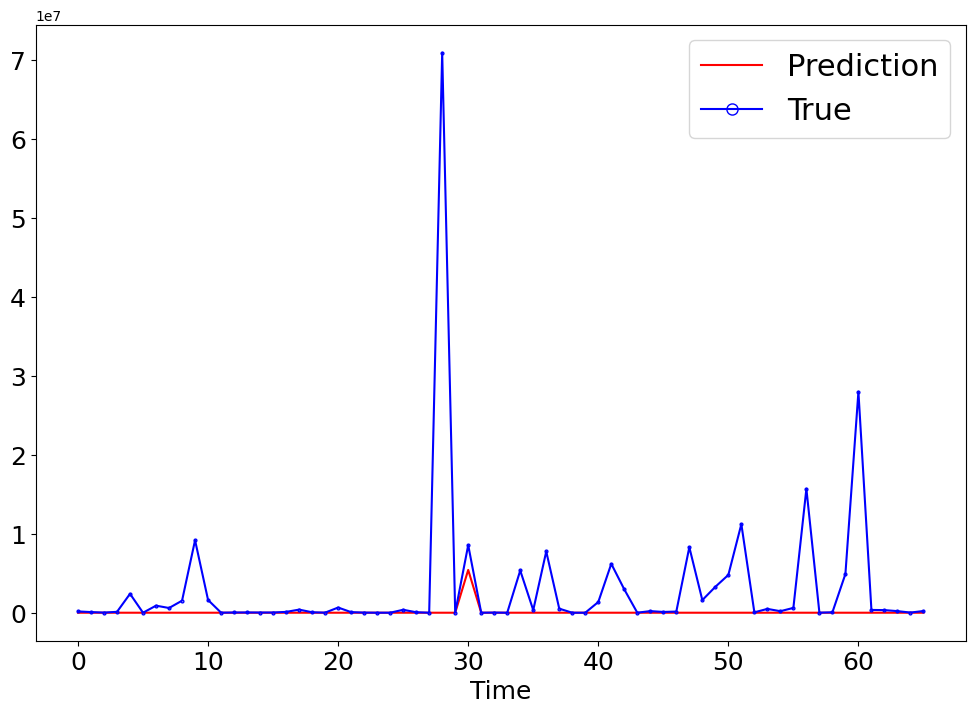

In [20]:
# Perfomance on validation data
t,p = model.predict(indices=model.test_indices)

Now in order to optimize the parameters define parameter space for the parameters to be optimized

In [21]:
from skopt.space import Real, Categorical, Integer

dims = [Categorical([32, 64, 128, 256], name='lstm_units'),
        Integer(low=3, high=12, name='lookback'),
        Real(low=1e-5, high=0.01, name='learning_rate'),
        Categorical(categories=[8, 12, 16, 24, 32], name="batch_size"),
        Categorical(categories=["relu", "elu", "leakyrelu"], name="dense_actfn")
        ]

Define objective function. The parameters to be optimized (which have been declared above) will be in kwargs. We can use them in our objective function as we like.

In [22]:
def objective_fn(return_model=False,
                 title="bayes", # This will make sure that all optimization results will be stored in a single folder
                 **kwargs):

    layers = {
        "LSTM": {"config": {"units": int(kwargs["lstm_units"])}},
        "Dense": {"config": {"units": 1, "activation": kwargs["dense_actfn"]}},
        "Reshape": {"config": {"target_shape": (1,1)}}
    }

    model = Model(
                data=data,
                prefix=title,
                verbosity=0,
                inputs=inputs,
                outputs=outputs,
                lookback=int(kwargs["lookback"]),
                val_data="same",
                val_fraction=0.0,
                test_fraction=0.3,
                model={'layers':layers},
                batch_size=int(kwargs["batch_size"]),
                lr=float(kwargs["learning_rate"]),
                epochs=500
                  )

    history = model.fit(indices="random")

    mse = np.min(history.history['val_loss'])
    print(f"Validation mse {mse}")

    if return_model:
        return model
    return mse

Initiatialize optimization problem. Since we are using the external function/model and not `AI4Water`, we need to provide 
the objective function/model/function as keyword argument `model`. The remaming parameters are same as above and they 
which will be passed to [`gp_minimize`](https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html#skopt.gp_minimize).

In [23]:
opt = HyperOpt("bayes",
               objective_fn=objective_fn,
               param_space=dims,
               acq_func='EI',  # Expected Improvement.
               n_calls=50,     #number of iterations
               # acq_optimizer='auto',
               x0=[32, 5, 0.001, 8, "relu"],  # inital value of optimizing parameters
               n_random_starts=3,  # the number of random initialization points
               random_state=2
               )

Start optimization

In [24]:
opt_results = opt.fit()

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 5, due to which first 5 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 5, due to which first 5 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 11, due to which first 11 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 11, due to which first 11 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0006362799904309213


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 9, due to which first 9 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 9, due to which first 9 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0008918442181311548


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 9, due to which first 9 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 9, due to which first 9 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0006468491046689451


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0009696451015770435


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0009405901655554771


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0013034408912062645


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011052591726183891


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0008273370913229883


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0009756117360666394


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0008833609172143042


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 11, due to which first 11 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 11, due to which first 11 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0009805933805182576


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0009706860291771591


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 4, due to which first 4 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 4, due to which first 4 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0007163629052229226


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0007595050847157836


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 11, due to which first 11 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 11, due to which first 11 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.000975246774032712


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.000780904374551028


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0008504580473527312


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 11, due to which first 11 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 11, due to which first 11 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001223207451403141


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0008576299296692014


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0008098913240246475


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0004192554915789515


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0009759272797964513


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0009178579202853143


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0008323197835125029


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0006926300120539963


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0012603153008967638


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0010758194839581847


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011374199530109763


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0006247240817174315


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001261668629013002


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001263727666810155


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0012270408915355802


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0008172386442311108


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0008484613499604166


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0011329888366162777


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 3, due to which first 3 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.0009768757736310363
could not pickle results


/usr/local/lib/python3.7/dist-packages/AI4Water/hyper_opt/hyper_opt.py:1160: UserWarning:

You must optuna and plotly installed to get hyper-parameter importance.



The optimized value of objective function will be the lowest mse achieved during model's iterations.

In [25]:
opt.gpmin_results['fun']

0.0004192554915789515

And the parameters which produced this (best) value are

In [26]:
opt.best_paras()

{'batch_size': 32,
 'dense_actfn': 'relu',
 'learning_rate': 0.00026072605479579526,
 'lookback': 12,
 'lstm_units': 256}

Now we can train the LSTM model with the best parameters

In [27]:
model = objective_fn(return_model=True, title=None,
                    lstm_units=128, lookback=12, learning_rate=0.00391297699511148, batch_size=24, dense_actfn="elu")

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



Validation mse 0.001155850593931973


/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



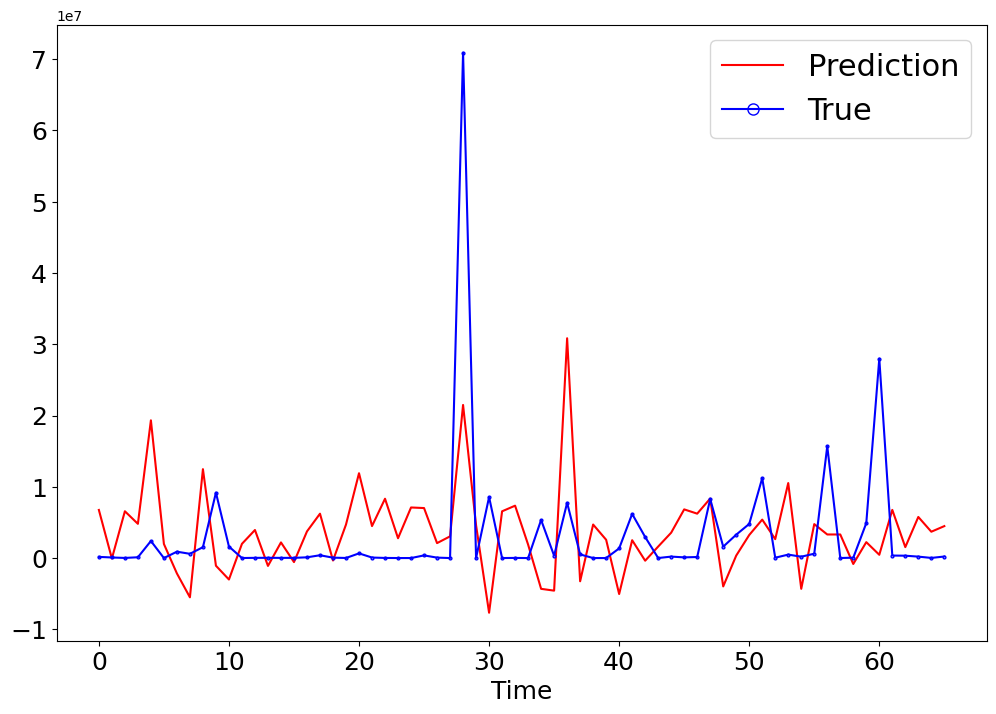

In [28]:
# Perfomance on validation data
t,p_test = model.predict(indices=model.test_indices)

/usr/local/lib/python3.7/dist-packages/AI4Water/main.py:508: UserWarning:

lookback is 12, due to which first 12 nan
                                          containing values were skipped from start. This may lead to some wrong examples
                                          at the start or an offset of 1 in indices.



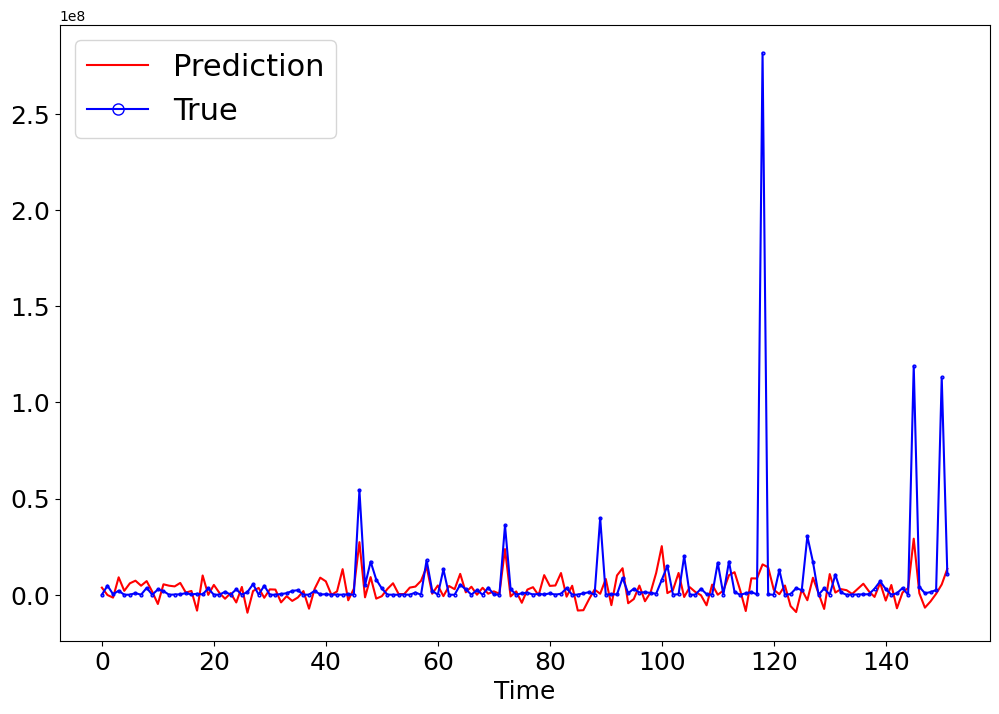

In [29]:
# Performance of the model on training data
t,p = model.predict(indices=model.train_indices, prefix='train')

currently we are ignoring examples where the corresponding labels are NaNs. We can check this.

In [30]:
model.config['allow_nan_labels']

0

The above argument means that for an example/sample if nans are found in its target/label, then don't ignore nan, 
rather skip that example. This is the reason, our trainig data was of about 155 examples and test/validation data
consisted of about 68 examples. 

At prediction time, we would however, like to check model's peformance on all the data irrespective of the fact whether 
labels are available or not. When labels are not available, we will not be able to caculate corresponding errors but the
model is able to make predictions on that data.

In [31]:
model.config['allow_nan_labels'] = 2
model.config['allow_nan_labels']

2


********** Allowing NANs in predictions **********



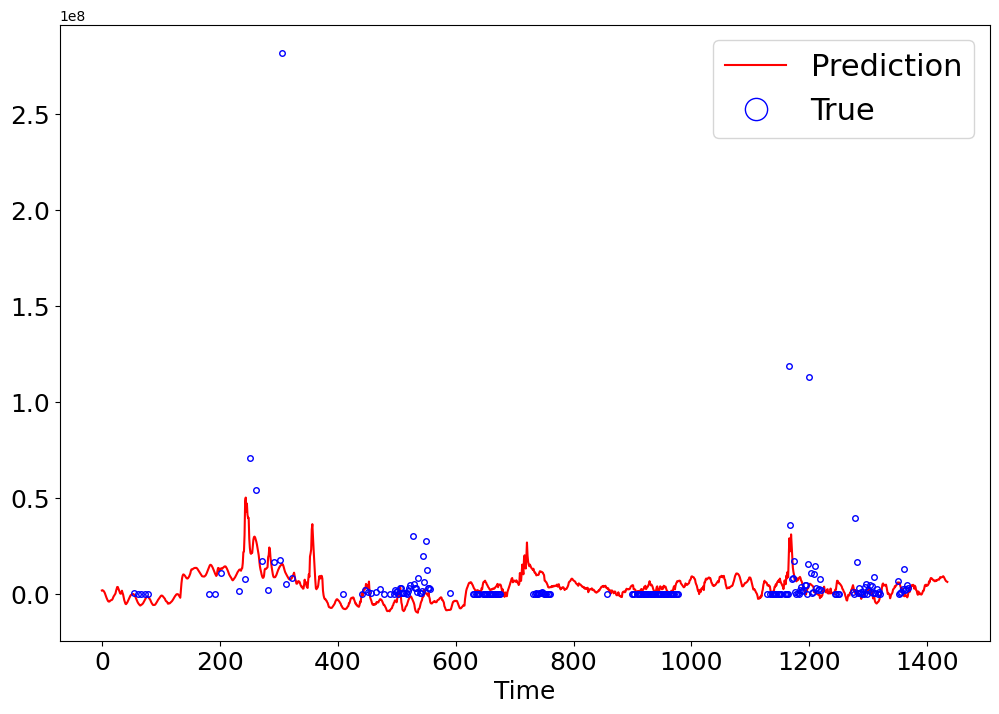

In [32]:
# Performance of the model on training data
t,p = model.predict(prefix='all')

In [33]:
# The results with the best model are  are saved in following folder.
model.path

'/content/results/20210514_141501'

# Optimizing multiple models
Because of simplified user interfaces of `AI4Water` and `HyperOpt`, we can now optimize hyper-parameters of multiple models/functions
with relatively few lines of code. For example if we want to optimize parameters of [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and 
[SupportVectorRessor](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html), we can do following.

Validation mse 3.867204738332256e+17
Validation mse 1688983556100340.5
Validation mse 1688983556100340.5
Validation mse 1688983556100340.5
Validation mse 1688983556100340.5
Validation mse 1688983556100340.5
Validation mse 1688983556100340.5
Validation mse 1688983556100340.5
Validation mse 1688983556100340.5
Validation mse 1688983556100340.5
Validation mse 1688983556100340.5


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983556101405.2
Validation mse 1688983547642176.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983546937373.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983546286746.0


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983545682625.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983545118764.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983544590173.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983544092645.0


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983543622779.0


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983543177635.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983542754765.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983542352026.2


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983541967581.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 1688983541599874.5
could not pickle results


/usr/local/lib/python3.7/dist-packages/AI4Water/hyper_opt/hyper_opt.py:1160: UserWarning:

You must optuna and plotly installed to get hyper-parameter importance.



building ML based model for regression problem

********** Removing Samples with nan labels  **********

input_x shape:  (152, 8)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (66, 8)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 1688983541599874.5

********** Removing Samples with nan labels  **********

input_x shape:  (152, 8)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (218, 8)
prev_y shape:  (218, 1)
target shape:  (218,)


/usr/local/lib/python3.7/dist-packages/AI4Water/utils/plotting_tools.py:402: UserWarning:

for poly kernels of SVR, feature importance can not be plotted.



building ML based model for regression problem

********** Removing Samples with nan labels  **********

input_x shape:  (152, 8)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (66, 8)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 1688983541599874.5

********** Removing Samples with nan labels  **********

input_x shape:  (152, 8)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (218, 8)
prev_y shape:  (218, 1)
target shape:  (218,)


/usr/local/lib/python3.7/dist-packages/AI4Water/utils/plotting_tools.py:402: UserWarning:

for poly kernels of SVR, feature importance can not be plotted.




********** Removing Samples with nan labels  **********

input_x shape:  (66, 8)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 98591205567927.08
Validation mse 102530480032284.8
Validation mse 118713057124103.31
Validation mse 103680222561169.8
Validation mse 118713057124103.31
Validation mse 103680222561169.8
Validation mse 118713057124103.31
Validation mse 103680222561169.8
Validation mse 118713057124103.31
Validation mse 103680222561169.8
Validation mse 118713057124103.31


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Validation mse 103680222561169.8
could not pickle results


/usr/local/lib/python3.7/dist-packages/AI4Water/hyper_opt/hyper_opt.py:1160: UserWarning:

You must optuna and plotly installed to get hyper-parameter importance.



building ML based model for regression problem

********** Removing Samples with nan labels  **********

input_x shape:  (152, 8)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (66, 8)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 98591205567927.08

********** Removing Samples with nan labels  **********

input_x shape:  (152, 8)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (218, 8)
prev_y shape:  (218, 1)
target shape:  (218,)
building ML based model for regression problem

********** Removing Samples with nan labels  **********

input_x shape:  (152, 8)
prev_y shape:  (152, 1)
target shape:  (152,)

********** Removing Samples with nan labels  **********

input_x shape:  (66, 8)
prev_y shape:  (66, 1)
target shape:  (66,)
Validation mse 98591205567927.08

********** Removing Samples with nan labels  **********

input_x shape:

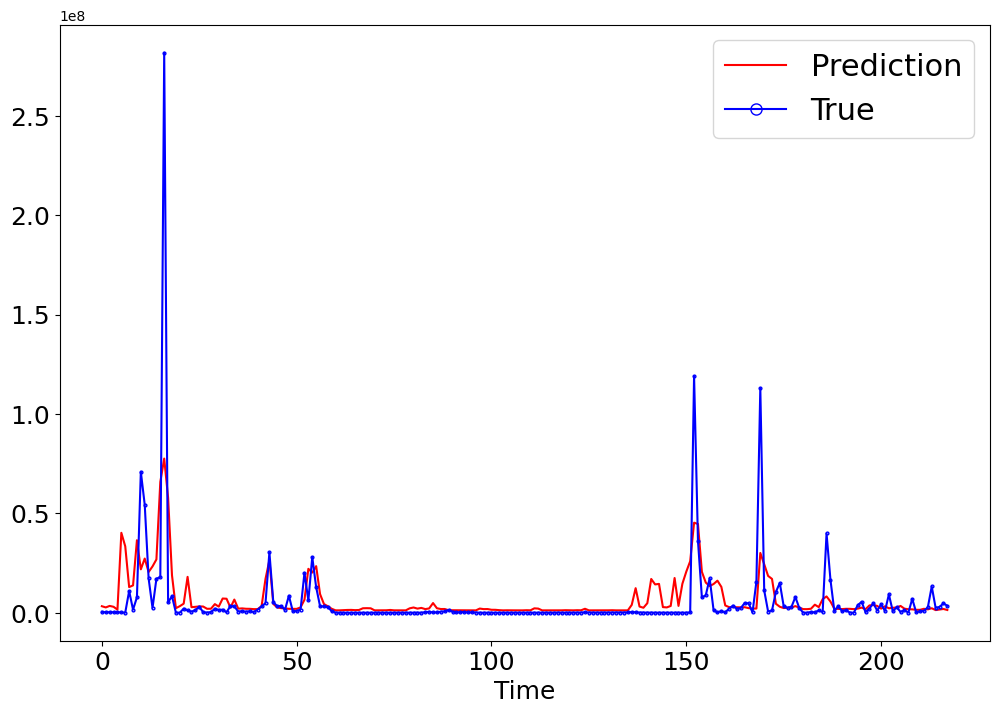

In [34]:
dims = {"SVR": {"dims":
               [Categorical(categories=[0.1, 0.2, 0.3, 0.4, 0.5], name='epsilon'),
                Integer(low=3, high=6, name='degree'),
                Real(low=1.0, high=2.0, name='C'),
                Categorical(categories=["linear", "poly", "rbf", "sigmoid"], name="kernel")],
                "x0": [0.2, 3, 1.5, "sigmoid"]},

        "RandomForestRegressor":
        {"dims":
         [Categorical(categories=[100, 300, 500, 700, 900, 1100], name="n_estimators"),
          Integer(low=3, high=6, name='max_depth'),
          Integer(low=2, high=5, name='min_samples_split'),
          Integer(low=1, high=4, name='min_samples_leaf')],
         "x0": [300, 4, 3, 3]}
     }

# container for saving the results.
results = {}

for model, paras in dims.items():

    opt = HyperOpt("bayes",
                   param_space=paras['dims'],
                   ai4water_args= {"inputs": inputs,
                                 "outputs": outputs,
                                 "val_data": "same",
                                 "model": {model: {}},
                                 "test_fraction": 0.3},
                   data=data,
                   eval_on_best=True,
                   n_calls=25, 
                   x0=paras["x0"]
                   )

    sr = opt.fit()
    _model = opt.eval_with_best(return_model=True)
    results[model] = _model.predict(indices=_model.test_indices, pp=False)
    

By adding more models in `dims` dictionary above, we optimize parameters of more models.

We can compare the performance of two models using [Taylor's diagram](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2000JD900719).

In [35]:
from AI4Water.utils.taylor_diagram import plot_taylor

trues = {'Test': results["RandomForestRegressor"][0]}

simulations = {"Test": {
    "SVR": results["SVR"][1],
    "RandomForestRegressor": results["RandomForestRegressor"][1],
}}

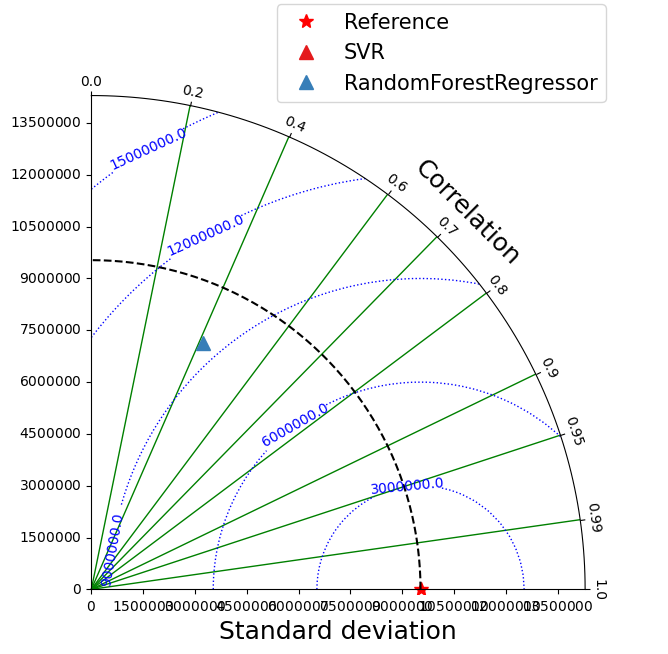

In [36]:
plot_taylor(trues=trues,
            simulations=simulations,
            add_grid=True,
            plot_bias=True,
            figsize=(8,6),
            cont_kws={'colors': 'blue', 'linewidths': 1.0, 'linestyles': 'dotted'},
            grid_kws={'axis': 'x', 'color': 'g', 'lw': 1.0},
            leg_kws={'numpoints': 1, 'fontsize': 15, 'markerscale': 1, 'bbox_to_anchor':(0.77, 1.1)}
           )